# Model evaluation on test data

In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

## Load test images and model for evaluation

In [2]:
# Create image generator for test data
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Path of test images directory
test_dir = '../dataset/forest_fire/testing'

# Load in test images to generator
test_ds = test_gen.flow_from_directory(directory=test_dir,
                                       target_size=(299,299),
                                       batch_size=32,
                                       shuffle=False)

Found 68 images belonging to 2 classes.


In [3]:
# Model path
model_path = '../models/xception_v5_01_0.985.h5'

# Loat the model
model = tf.keras.models.load_model(filepath=model_path)

In [4]:
# Evaluate the model on test set
model.evaluate(test_ds)

3/3 [==============================] - 37s 9s/step - loss: 0.5197 - accuracy: 0.9853


[0.5196702480316162, 0.9852941036224365]

## Making prediction on custom images

In [5]:
# Path of an image to make predictions
wildfire_img_path = '../assets/fire_img.jpg'
land_img_path = '../assets/land_img.jpg'

In [6]:
# Load images
wildfire_img = load_img(wildfire_img_path, target_size=(299, 299))
land_img = load_img(land_img_path, target_size=(299, 299))

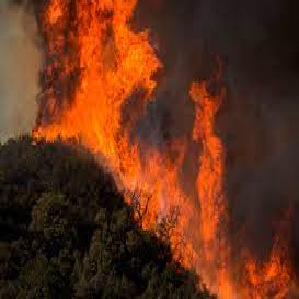

In [7]:
wildfire_img

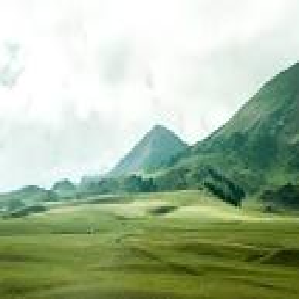

In [8]:
land_img

### Wildfire image

In [9]:
# Convert wildfire image to numpy array
x = np.array(wildfire_img, dtype=np.float32)
# Add batch dimension to the image
X_wildfire = tf.expand_dims(x, axis=0)

# Preprocess the image 
X_wildfire = preprocess_input(X_wildfire)
X_wildfire

<tf.Tensor: shape=(1, 299, 299, 3), dtype=float32, numpy=
array([[[[-0.24705881, -0.26274508, -0.44313723],
         [-0.23921567, -0.25490195, -0.4352941 ],
         [-0.21568626, -0.25490195, -0.42745095],
         ...,
         [-0.8352941 , -0.90588236, -0.94509804],
         [-0.8352941 , -0.90588236, -0.94509804],
         [-0.8352941 , -0.90588236, -0.94509804]],

        [[-0.24705881, -0.26274508, -0.44313723],
         [-0.23921567, -0.25490195, -0.4352941 ],
         [-0.21568626, -0.25490195, -0.42745095],
         ...,
         [-0.8352941 , -0.90588236, -0.94509804],
         [-0.8352941 , -0.90588236, -0.94509804],
         [-0.8352941 , -0.90588236, -0.94509804]],

        [[-0.23137254, -0.27058822, -0.44313723],
         [-0.2235294 , -0.26274508, -0.4352941 ],
         [-0.2235294 , -0.26274508, -0.4352941 ],
         ...,
         [-0.8352941 , -0.90588236, -0.94509804],
         [-0.8352941 , -0.90588236, -0.94509804],
         [-0.8352941 , -0.90588236, -0.9450980

In [10]:
# Make prediction
pred_wildfire = model.predict(X_wildfire)[0]
pred_wildfire

1/1 [==============================] - 2s 2s/step


array([1., 0.], dtype=float32)

In [11]:
# Get the class names
class_names = list(test_ds.class_indices.keys())
class_names

['fire', 'nofire']

In [12]:
# Zip the class names and prediction
dict(zip(class_names, pred_wildfire))

{'fire': 1.0, 'nofire': 0.0}

### Landscape image

In [13]:
# Convert landscape image to numpy array
x = np.array(land_img, dtype=np.float32)
# Add batch dimension to the image
X_land = tf.expand_dims(x, axis=0)

# Preprocess the image 
X_land = preprocess_input(X_land)

# Make prediction
pred_land = model.predict(X_land)[0]

# Zip the class names and prediction
dict(zip(class_names, pred_land))

1/1 [==============================] - 0s 408ms/step


{'fire': 0.0, 'nofire': 1.0}

Our next step is to convert the TensorFlow model to a TensorFlow Lite (TFLite) model optimized for mobile and embedded devices. This process involves exporting the model to a TensorFlow SavedModel format, converting it to TFLite's FlatBuffer format and applying optimization techniques.